In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model, to_categorical
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# functional approach of model generation
input_ = tf.keras.layers.Input(shape=(28, 28))
flatten_input = tf.keras.layers.Flatten(input_shape=(28, 28))(input_)
hidden_l1 = tf.keras.layers.Dense(1024, activation='relu')(flatten_input)
# drop_out = tf.keras.layers.Dropout(rate=0.4)(hidden_l1)
hidden_l2 = tf.keras.layers.Dense(256, activation='relu')(hidden_l1)
hidden_l3 = tf.keras.layers.Dense(128, activation='relu')(hidden_l2)
hidden_l4 = tf.keras.layers.Dense(64, activation='relu')(hidden_l3)
output = tf.keras.layers.Dense(10, activation='softmax')(hidden_l4)

# create a model
model = tf.keras.Model(inputs=input_, outputs=output)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650   

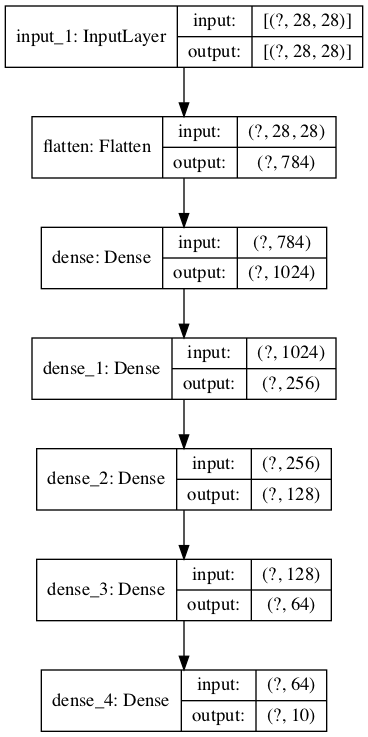

In [4]:
# visulizing the model just created
plot_model(model, to_file='model_plot.png', show_shapes=True,
                      show_layer_names=True)

In [5]:
optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.005, rho=0.95, epsilon=1e-07,name='Adadelta')
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0, name='categorical_crossentropy')
# configure the model for training using comiple() method
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [6]:
# extracting training and testing datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# converting datatype and normalize training and testing data
X_train, X_test = X_train.astype('float32')/X_train.max(), X_test.astype('float32')/X_test.max()

# one-hot vector representation of target level
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# split train and validation data
X_train, X_valid = X_train[10000:], X_train[:10000]
y_train, y_valid = y_train[10000:], y_train[:10000]

In [7]:
epochs = 60
batch_size = 256
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 8s 155us/sample - loss: 2.3018 - accuracy: 0.1274 - val_loss: 2.2994 - val_accuracy: 0.1455
Epoch 2/60
50000/50000 [==============================] - 7s 134us/sample - loss: 2.2968 - accuracy: 0.1773 - val_loss: 2.2938 - val_accuracy: 0.2122
Epoch 3/60
50000/50000 [==============================] - 6s 129us/sample - loss: 2.2908 - accuracy: 0.2534 - val_loss: 2.2868 - val_accuracy: 0.2877
Epoch 4/60
50000/50000 [==============================] - 7s 134us/sample - loss: 2.2831 - accuracy: 0.3216 - val_loss: 2.2776 - val_accuracy: 0.3541
Epoch 5/60
50000/50000 [==============================] - 6s 129us/sample - loss: 2.2725 - accuracy: 0.3781 - val_loss: 2.2641 - val_accuracy: 0.4017
Epoch 6/60
50000/50000 [==============================] - 7s 133us/sample - loss: 2.2559 - accuracy: 0.4096 - val_loss: 2.2419 - val_accuracy: 0.4268
Epoch 7/60
50000/50000 [==========================

Epoch 55/60
50000/50000 [==============================] - 7s 137us/sample - loss: 1.6724 - accuracy: 0.8158 - val_loss: 1.6703 - val_accuracy: 0.8148
Epoch 56/60
50000/50000 [==============================] - 8s 153us/sample - loss: 1.6693 - accuracy: 0.8182 - val_loss: 1.6679 - val_accuracy: 0.8159
Epoch 57/60
50000/50000 [==============================] - 8s 155us/sample - loss: 1.6666 - accuracy: 0.8198 - val_loss: 1.6655 - val_accuracy: 0.8174
Epoch 58/60
50000/50000 [==============================] - 7s 147us/sample - loss: 1.6643 - accuracy: 0.8215 - val_loss: 1.6634 - val_accuracy: 0.8183
Epoch 59/60
50000/50000 [==============================] - 7s 138us/sample - loss: 1.6622 - accuracy: 0.8227 - val_loss: 1.6616 - val_accuracy: 0.8204
Epoch 60/60
50000/50000 [==============================] - 7s 138us/sample - loss: 1.6603 - accuracy: 0.8236 - val_loss: 1.6599 - val_accuracy: 0.8213


In [8]:
train_loss, train_accuracy = history.history['loss'], history.history['accuracy']
val_loss, val_accuracy = history.history['val_loss'], history.history['val_accuracy']

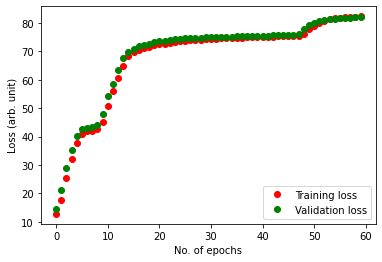

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(range(epochs), np.asarray(train_accuracy)*100, 'ro', label='Training loss')
plt.plot(range(epochs), np.asarray(val_accuracy)*100, 'go', label='Validation loss')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy(%)')
plt.ylabel('Loss (arb. unit)')
plt.legend()
plt.show()

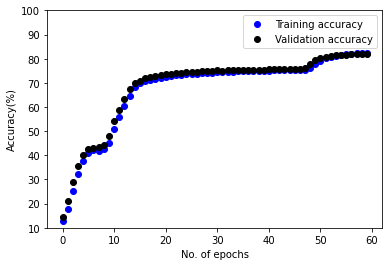

In [10]:
plt.plot(range(epochs), np.asarray(train_accuracy)*100, 'bo', label='Training accuracy')
plt.plot(range(epochs), np.asarray(val_accuracy)*100, 'ko', label='Validation accuracy')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy(%)')
plt.ylim([10, 100])
plt.legend()

In [11]:
max(train_accuracy)

0.82364

In [12]:
max(val_accuracy)

0.8213

In [13]:
prediction = model.predict(X_test)

In [14]:
prediction[0]

array([7.7747536e-06, 7.5712894e-09, 2.4814744e-06, 1.0474055e-05,
       7.5994731e-09, 5.0897688e-05, 1.0161928e-08, 9.9985659e-01,
       7.0209683e-07, 7.0986622e-05], dtype=float32)

The first digit in the training dataset is:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


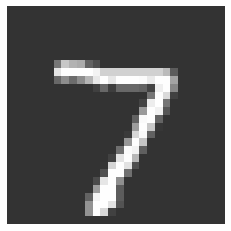

In [15]:
print('The first digit in the training dataset is: ', y_test[0])

# plotting first digit in the training dataset
plt.imshow(X_test[0], cmap='gray', alpha=0.8)
plt.axis('off')
plt.show()

In [16]:
test_loss, test_accuracy = model.evaluate(x=X_test, y=y_test, batch_size=128, verbose=0, sample_weight=None, steps=None,
                              callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

In [17]:
print('Test loss: ', test_loss, ',',  'Test accuracy: ', test_accuracy)

Test loss:  1.653992321395874 , Test accuracy:  0.8282
